### Initialization of Variables

In [58]:
all = [var for var in globals() if var[0] != '_']
for var in all:
    del globals()[var]
del all

### Module Import

In [59]:
import numpy as np
import os, sys
import importlib
import matplotlib.pyplot as plt
sys.path.append("../Assignment_2")
import module_opt
importlib.reload(module_opt)
from module_opt import *

### Test Functions for Constrained Optimization

1. Rosenbrock function constrained within a disk  
min &nbsp; $ f(x_1, x_2) = (1 - x_1)^2 + 100(x_2 - x_1^2)^2 $  
s.t. &nbsp; $ c(x_1, x_2) = 2 -x_1^2 - x_2^2 ≥ 0 $

2. Rosenbrock function on a disk  
min &nbsp; $ f(x_1, x_2) = (1 - x_1)^2 + 100(x_2 - x_1^2)^2 $  
s.t. &nbsp; $ c(x_1, x_2) = 1 - x_1^2 - x_2^2 = 0 $

3. Rosenbrock function on straight line  
min &nbsp; $ f(x_1, x_2) = (1 - x_1)^2 + 100(x_2 - x_1^2)^2 $  
s.t. &nbsp; $ c(x_1, x_2) = 1 - x_1 - x_2 = 0 $

4. Mishra's Bird function  
min &nbsp; $ f(x_1, x_2) = sin(x_2)e^{(1-cosx_1)^2} + cos(x_1)e^{(1-sinx_2)^2} + (x_1 - x_2)^2 $  
s.t. &nbsp; $ c(x_1, x_2) = - (x_1 + 5)^2 - (x_2 + 5)^2 + 25 ≥ 0 $

5. Townsend function  
min &nbsp; $ f(x1, x_2) = -[cos{(x_1 - 0.1)x_2}]^2 - x_1sin(3x_1 + x_2) $  
s.t. &nbsp; $ c(x1, x_2) = -x_1^2 - x_2^2 + [2cos\{atan2(x_1, x_2)\} - \frac{1}{2}cos\{2atan2(x_1, x_2)\} - \frac{1}{4}cos\{3atan2(x_1, x_2)\} - \frac{1}{8}cos\{4atan2(x_1, x_2)\}]^2 + [2sin\{atan2(x_1, x_2)\}]^2 ≥ 0 $





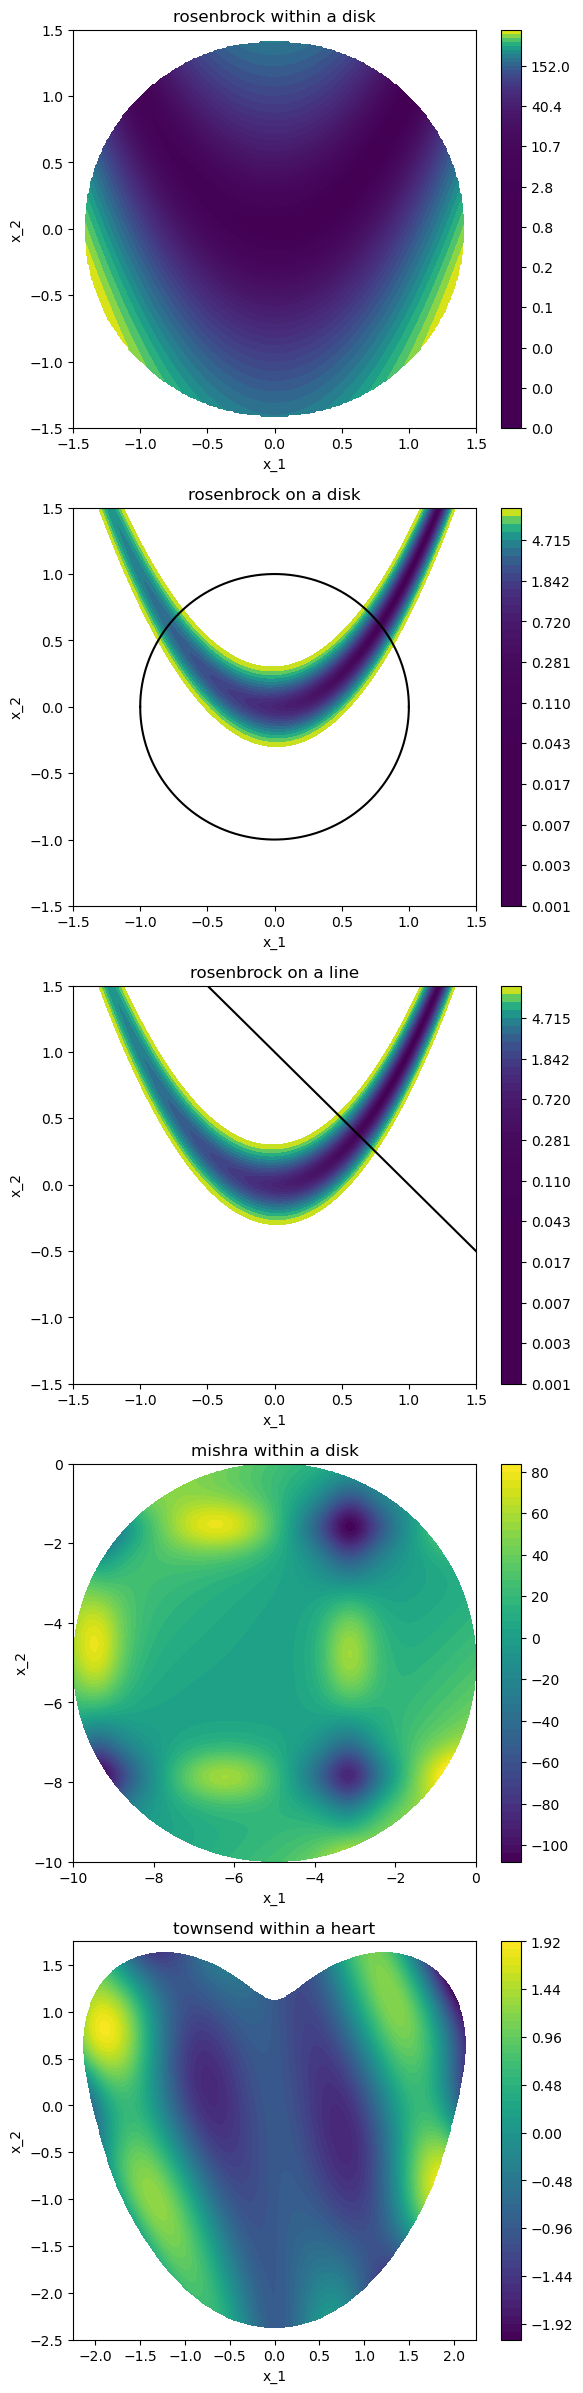

In [60]:
### define functions
f_rosenbrock = lambda x : (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2
c_rosenbrock = lambda x : 2 - x[0]**2 - x[1]**2

f_rosenbrock_eqdisk = lambda x : f_rosenbrock(x)
c_rosenbrock_eqdisk = lambda x : 1 - x[0]**2 - x[1]**2

f_rosenbrock_eqline = lambda x : f_rosenbrock(x)
c_rosenbrock_eqline = lambda x : 1 - x[0] - x[1]

f_mishra = lambda x : np.sin(x[1])*np.exp((1-np.cos(x[0]))**2) + np.cos(x[0])*np.exp((1-np.sin(x[1]))**2) + (x[0] - x[1])**2
c_mishra = lambda x : -(x[0] + 5)**2 - (x[1] + 5)**2 + 25

f_townsend = lambda x : -(np.cos((x[0] - .1)*x[1]))**2 - x[0]*np.sin(3*x[0] + x[1])
c_townsend = lambda x : -x[0]**2 - x[1]**2 + (2*np.cos(np.atan2(x[0], x[1])) - .5*np.cos(2*np.atan2(x[0], x[1])) -.25*np.cos(3*np.atan2(x[0], x[1])) - .125*np.cos(4*np.atan2(x[0], x[1])))**2 + (2*np.sin(np.atan2(x[0], x[1])))**2

### evaluate functions
step_rosenbrock = .01
grid_rosenbrock = np.meshgrid(np.arange(-1.5, 1.5+step_rosenbrock, step_rosenbrock), np.arange(-1.5, 1.5+step_rosenbrock, step_rosenbrock))
fval_grid_rosenbrock = f_rosenbrock(grid_rosenbrock)
fval_grid_rosenbrock[c_rosenbrock(grid_rosenbrock) < 0] = None

step_rosenbrock_eq = .01
grid_rosenbrock_eq = np.meshgrid(np.arange(-1.5, 1.5+step_rosenbrock_eq, step_rosenbrock_eq), np.arange(-1.5, 1.5+step_rosenbrock_eq, step_rosenbrock_eq))
fval_grid_rosenbrock_eq = f_rosenbrock(grid_rosenbrock_eq)

step_mishra = .01
grid_mishra = np.meshgrid(np.arange(-10, 0+step_mishra, step_mishra), np.arange(-10, 0+step_mishra, step_mishra))
fval_grid_mishra = f_mishra(grid_mishra)
fval_grid_mishra[c_mishra(grid_mishra) < 0] = None

step_townsend = .01
grid_townsend = np.meshgrid(np.arange(-2.25, 2.25+step_townsend, step_townsend), np.arange(-2.5, 1.75+step_townsend, step_townsend))
fval_grid_townsend = f_townsend(grid_townsend)
fval_grid_townsend[c_townsend(grid_townsend) < 0] = None

### plot functions
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(6.5, 6*5))
contour_0 = axes[0].contourf(grid_rosenbrock[0], grid_rosenbrock[1], fval_grid_rosenbrock, levels=np.logspace(-3, 2.7, 100))
axes[0].set_xlabel('x_1'); axes[0].set_ylabel('x_2'); axes[0].set_title('rosenbrock within a disk')
fig.colorbar(contour_0, ax=axes[0])

contour_1 = axes[1].contourf(grid_rosenbrock_eq[0], grid_rosenbrock_eq[1], fval_grid_rosenbrock_eq, levels=np.logspace(-3, 1))
x_disk_eq = np.arange(-1.0, 1+.0001, .0001); y_disk_eq_pos = (1 - x_disk_eq**2)**.5; y_disk_eq_neg = -(1 - x_disk_eq**2)**.5
axes[1].plot(x_disk_eq, y_disk_eq_pos, 'k') 
axes[1].plot(x_disk_eq, y_disk_eq_neg, 'k')
axes[1].set_xlabel('x_1'); axes[1].set_ylabel('x_2'); axes[1].set_title('rosenbrock on a disk')
fig.colorbar(contour_1, ax=axes[1])

contour_2 = axes[2].contourf(grid_rosenbrock_eq[0], grid_rosenbrock_eq[1], fval_grid_rosenbrock_eq, levels=np.logspace(-3, 1))
x_line_eq = np.arange(-0.5, 1.5+.01, .01); y_line_eq = 1 - x_line_eq
axes[2].plot(x_line_eq, y_line_eq, 'k')
axes[2].set_xlabel('x_1'); axes[2].set_ylabel('x_2'); axes[2].set_title('rosenbrock on a line')
fig.colorbar(contour_2, ax=axes[2])

contour_3 = axes[3].contourf(grid_mishra[0], grid_mishra[1], fval_grid_mishra, levels=50)
axes[3].set_xlabel('x_1'); axes[3].set_ylabel('x_2'); axes[3].set_title('mishra within a disk')
fig.colorbar(contour_3, ax=axes[3])

contour_4 = axes[4].contourf(grid_townsend[0], grid_townsend[1], fval_grid_townsend, levels=50)
axes[4].set_xlabel('x_1'); axes[4].set_ylabel('x_2'); axes[4].set_title('townsend within a heart')
fig.colorbar(contour_4, ax=axes[4])


### Quadratic Penalty Method(QPM) 함수 초안

In [61]:
f = f_rosenbrock # objective function
ce = [] # equality constraints
ci = [c_rosenbrock] # inequality constraints
x0 = np.array([-1, -1])

# f = f_rosenbrock_eqdisk # objective function
# ce = [c_rosenbrock_eqdisk] # equality constraints
# ci = [] # inequality constraints
# x0 = np.array([-.5, -.5])

# f = f_rosenbrock_eqline # objective function
# ce = [c_rosenbrock_eqline] # equality constraints
# ci = [] # inequality constraints
# x0 = np.array([-.5, -.5])

# f = f_mishra # objective function
# ce = [] # equality constraints
# ci = [c_mishra] # inequality constraints
# x0 = np.array([-3, -3])

# f = f_townsend # objective function
# ce = [] # equality constraints
# ci = [c_townsend] # inequality constraints
# x0 = np.array([1.4, 1])

##########################################################################################################################
inner_opt = quasi_newton_bfgs
tol = 1e-4

if (len(ci) + len(ce)) == 0:
    raise ValueError('Please input at least either one equality constraint or one inequality constraint !')

if (not isinstance(x0, np.ndarray)) | (x0.ndim >= 2):
    raise ValueError('Please input 1D ndarray type !!')

if (inner_opt == newton):
    raise ValueError('Please choose 1st derivative based optimization method when using QPM !')

f0 = f(x0)
if not np.isfinite(f0).all():
    raise ValueError('Function value at x0 is not finite. Try another x0 !')

### Check inequality feasibility of x0
if len(ci) >= 1: # 부등호제약조건은 feasibility 고려하고 등호제약조건은 미고려(∵ exactly하게 맞추기가 더 어려움)
    infeasible_ci = [ci_i(x0) for ci_i in ci if ci_i(x0) < 0] # infeasible criteria of c
    if len(infeasible_ci) >= 1:
        raise ValueError(f'Infeasible x0 for {len(infeasible_ci)} inequality constraint(s). Try feasible x0 !')

### Check gradient of x0
grad0 = grad_centraldiff(f, x0)
if np.linalg.norm(grad0) < tol: # Check optimality
    print(f'Since |grad(x0)| = {np.linalg.norm(grad0)} < {tol}, x0 : {x0} is optimum point !')
    # return x0
else:
    print(f'Since |grad(x0)| = {np.linalg.norm(grad0)} > {tol}, x0 : {x0} is not an optimum point. Optimization begins !')
    pass

### constraints manipulation
if len(ce) == 0:
    ce = [lambda x : 0]
if len(ci) == 0:
    ci = [lambda x : 0]

### Initialization for searching iterations
# Qk 만들 때 필요한 quadratic penalty term of constraints 미리 정의
sum_ce_sq = lambda x : np.sum([(ce_i(x))**2 for ce_i in ce]) # sum(c_e(x)^2) for Qk
sum_ci_sq = lambda x : np.sum([(np.max([-ci_i(x), 0]))**2 for ci_i in ci]) # sum(c_i(x)^2) for Qk

x_new = x0
f_mu = 5; mu_new = 1 # increase factor for penalty parameter mu ; mu0 = 1
f_tau = .5; tau_new = .2 # decrease factor for convergence criteria for Qk ; tau0 = .2

### Outer loop begins
for j in np.arange(100): # mu가 너무 커지면 Qk가 unstable해지기 때문에 어차피 finite한 iterations 내에서 쇼부를 봐야 한다.
    # Finding a x*_k in Qk
    x_cur = x_new # x_k
    mu_cur = mu_new; print(f'mu_{j} = {mu_cur}') # penalty parameter update(increase)
    tau_cur = tau_new; print(f'tau_{j} = {tau_cur}') # Qk convergence criteria update(decrease)
    Q_cur = lambda x : f(x) + .5*mu_cur*sum_ce_sq(x) + .5*mu_cur*sum_ci_sq(x) # quadratic penalty function Qk at x_k
    list_x, list_f, list_grad = inner_opt(Q_cur, x_cur, tau_cur) # Solving ∇Qk(x*_k) ≤ tau_k ; Inner loop
    x_new = list_x[-1]
    mu_new = mu_cur*f_mu
    tau_new = tau_cur*f_tau

    # Convergence check of x*
    move_x = np.linalg.norm(x_new - x_cur) # convergence criteria of x*_k
    violated_ce = [ce_i(x_new) for ce_i in ce if np.abs(ce_i(x_new)) > 1e-4] # violation criteria of ce(x*_k)
    violated_ci = [ci_i(x_new) for ci_i in ci if ci_i(x_new) < -1e-4] # violation criteria of ci(x*_k)
    if (move_x < 1e-4) & (len(violated_ci) == 0) & (len(violated_ce) == 0):
        done = True # flag for termination of outerloop
    else:
        done = False

    print(f'{j+1}-th outer loop : Inner loop converges at {len(list_x) - 1} iteration(s) ...')
    print(f'|x_{j+1} - x_{j}| = {move_x}')
    print(f'# of violated ce constraints : {len(violated_ce)}, violation : {np.sum(violated_ce)}')
    print(f'# of violated ci constraints : {len(violated_ci)}, violation : {np.sum(violated_ci)}')
    print(f'\n------------------------------------------------------------- Outer loop ----------------------------------------------------------------\n')

    if done:
        print(f'Outer loop converges at {j+1} iteration(s) !')
        print(f'iter = {j+1} x* = {x_new}, f(x*) = {f(x_new)}, |ce(x*)|₁ = {np.sum(np.abs([ce_i(x_new) for ce_i in ce]))}, |ci(x*)|₁ = {np.sum(np.abs([ci_i(x_new) for ci_i in ci]))}')
        break

Since |grad(x0)| = 898.0066815483765 > 0.0001, x0 : [-1 -1] is not an optimum point. Optimization begins !
mu_0 = 1
tau_0 = 0.2
Since |grad(x0)| = 898.006682882098 > 0.2, x0 : [-1 -1] is not an optimum point. Optimization begins !
x_1 : [1.27073348 0.12971815]
f_1 : 220.6092862034404
norm(grad(x_1)) : 811.6733946907248
recent alpha : 0.0028242953648100005
recent p : [804.00000104 400.00000104]

x_2 : [1.12379397 2.28332658]
f_2 : 114.15923161649614
norm(grad(x_2)) : 501.4586079456753
recent alpha : 0.005314410000000001
recent p : [-27.64926047 405.23942151]

x_3 : [1.10702666 1.19114741]
f_3 : 0.3371069890859238
norm(grad(x_3)) : 17.680672686171846
recent alpha : 1
recent p : [-0.01676731 -1.09217917]

x_4 : [1.10047439 1.2020151 ]
f_4 : 0.23333904051222354
norm(grad(x_4)) : 5.62355897845626
recent alpha : 1
recent p : [-0.00655227  0.01086769]

x_5 : [1.09137071 1.18968317]
f_5 : 0.1924288846532289
norm(grad(x_5)) : 2.4178823789471604
recent alpha : 1
recent p : [-0.00910368 -0.012331

### ALM 함수 초안

In [62]:
f = f_rosenbrock # objective function
ce = [] # equality constraints
ci = [c_rosenbrock] # inequality constraints
x0 = np.array([-1, -1])

# f = f_rosenbrock_eqdisk # objective function
# ce = [c_rosenbrock_eqdisk] # equality constraints
# ci = [] # inequality constraints
# x0 = np.array([-.5, -.5])

# f = f_rosenbrock_eqline # objective function
# ce = [c_rosenbrock_eqline] # equality constraints
# ci = [] # inequality constraints
# x0 = np.array([-.5, -.5])

# # bfgs가 f_mishra에 대해서는 해를 못 찾고 발산한다. 0번째(초기) outer loop에서 만들어진 LAk가 penalty term을 전혀 포함하지 않아서 inner loop 들어가서 찾아지는 x*_k가 완전히 constraint 영역 바깥으로 나가버린다.
# # 근데 문제는 그다음 outer loop에서  penalty term이 생성되서 penalization을 해야 하는데 이 때 bfgs에서 찾는 p가 너무 작아서 alpha랑 결합해도 너무 작아서 점이 거의 안 움직인다.
# # 결과적으로 inner loop에서 찾는 x*_k가 이전 loop에서 찾은 것과 거의 똑같아서 x_k도, constraint violation도 거의 그대로나 마찬가지가 된다.
# # 이러한 문제는 cg_fr을 bfgs 대신 사용 시 해결되어진다. 잘 찾는다. 왜인지는 모르겠다. 근데 얘도 똑같이 p랑 alpha가 매우 작게 구해지는데 어찌저찌 다행히 올바른 path로 수렴해간다.
# f = f_mishra # objective function 
# ce = [] # equality constraints
# ci = [c_mishra] # inequality constraints
# x0 = np.array([-3, -3])

# # cg_fr이 첫번째 outer loop에서부터 x*_k를 찾지못해 쩔쩔맨다. 계속 발산함. penalty 항이 없으니까 밑도 끝도 없이 발산한다.
# # 페널티 항을 초반부터 형성해줘도 feaisble 영역을 벗어나서 계속 발산한다.
# # 이 문제에 너무 억매이지 말자. 굉장한 비선형성을 가진 함수이고 local stationary points도 정말 너무 많이 가지고 있는 개형이다.
# f = f_townsend # objective function
# ce = [] # equality constraints
# ci = [c_townsend] # inequality constraints
# x0 = np.array([1.4, 1])

##########################################################################################################################
inner_opt = quasi_newton_bfgs # cg_fr / quasi_newton_bfgs
tol = 1e-4

### Check input data type
if (not isinstance(ce, list)) | (not isinstance(ci, list)) | (len(ci) + len(ce) == 0):
    raise ValueError('Please input at least either one equality or inequality constraint as list type ! ; Empty list is OK as well.')

if (not isinstance(x0, np.ndarray)) | (x0.ndim >= 2):
    raise ValueError('Please input x0 as 1D ndarray type !!')

### Check f(x0)
f0 = f(x0)
if not np.isfinite(f0).all():
    raise ValueError('Function value at x0 is not finite. Try another x0 !')

### Check ci(x0) ≥ 0
if len(ci) >= 1: # 부등호제약조건은 feasibility 고려하고 등호제약조건은 미고려(∵ exactly하게 맞추기가 더 어려움)
    infeasible_ci = [ci_j(x0) for ci_j in ci if ci_j(x0) < 0] # infeasible criteria of c
    if len(infeasible_ci) >= 1:
        raise ValueError(f'Infeasible x0 for {len(infeasible_ci)} of {len(ci)} inequality constraint(s). Try feasible x0 !')

### Check ∇f(x0)
grad0 = grad_centraldiff(f, x0)
if np.linalg.norm(grad0) < tol: # Check optimality
    print(f'Since |grad(x0)| = {np.linalg.norm(grad0)} < {tol}, x0 : {x0} is optimum point !')
    # return x0

### constraints manipulation
if len(ce) == 0:
    ce = [lambda x : 0]
if len(ci) == 0:
    ci = [lambda x : 0]

### Initialization for searching iterations
x_new = x0

### Parameter setting for ALM
# Final tolerance for outer loop
tol_eq_final = 1e-6 # equality feasibility
tol_ineq_final = 1e-6 # inequality feasibility
tol_opt_final = 1e-6 # optimality (∥∇L_A∥∞)
tol_step_final = 1e-8 # step size (relative factor 포함 권장)

# Initial tolearnce of constraints for outer loop(점차 tighten)
tol_eq   = 1e-3
tol_ineq = 1e-3

# Tolerance update scheme for inner loop : tau_k = max(omega_min, omega0 * (omega_decay)^k)
omega0 = 1e-2
omega_decay = 0.5
omega_min = tol_opt_final
tau = omega0   # == tau_0

# Penalty parameter increase factor / upper bound
factor_mu  = 5.0
factor_rho = 5.0
mu_max   = 1e8
rho_max  = 1e8

lmbda = np.array([0]*len(ce)) # initial lagrange multipliers of equality constraints for Lk
nu = np.array([0]*len(ci)) # initial lagrange multipliers of inequality constraints
mu = 1 # increase factor for equality constraint penalty parameter mu ; mu0 = 1
rho = 1 # increase factor for inequality constraint penalty parameter rho ; rho0 = 1

### Outer loop begins
for k in np.arange(100): # mu가 너무 커지면 Qk가 unstable해지기 때문에 어차피 finite한 iterations 내에서 쇼부를 봐야 한다.
    x_cur = x_new # x_k
    print(f'mu_{k} = {mu}')
    print(f'rho_{k} = {rho}')
    print(f'tau_{k} = {tau}')

    # penalty term update
    penalty_ce = lambda x : -lmbda@np.array([ce_j(x) for ce_j in ce]) + .5*mu*np.sum(np.array([ce_j(x)**2 for ce_j in ce]))
    penalty_ci = lambda x : (-nu@np.array([ci_j(x) - np.maximum(ci_j(x) - nu[j]/rho, 0) for j, ci_j in enumerate(ci)]) +
                                    .5*rho*np.sum(np.array([(ci_j(x) - np.maximum(ci_j(x) - nu[j]/rho, 0))**2 for j, ci_j in enumerate(ci)])))

    LA_cur = lambda x : f(x) + penalty_ce(x) + penalty_ci(x) # augmented lagrangian function LAk at x_k
    log_inner = inner_opt(LA_cur, x_cur, tau) # solving ∇LAk(x*_k) ≤ tau_k ; Inner loop
    x_new = log_inner[0][-1]
    f_new = f(x_new)
    ce_new = np.array([ce_j(x_new) for ce_j in ce])
    ci_new = np.array([ci_j(x_new) for ci_j in ci])

    # --- multiplier updates (AFTER computing ce_new, ci_new) ---
    if len(ce) >= 1:
        lmbda = lmbda - mu * ce_new
    if len(ci) >= 1:
        nu = np.maximum(nu - rho * ci_new, 0.0)

    grad_LA_new = log_inner[-1][-1]

    # residual(잔차) 계산
    r_ce = np.max(np.abs(ce_new)) if len(ce_new) >= 1 else 0 # 등호제약조건 잔차(위반)
    r_ci = np.max(np.maximum(-ci_new, 0)) if len(ci_new) >= 1 else 0 # 부등호제약조건 잔차(위반)
    r_grad_LA = np.max(grad_LA_new) # ∇L_A 수준
    r_step = np.linalg.norm(x_new - x_cur) # x_new - x_cur 거리

    # Convergence check for Outer loop
    if ((r_ce <= tol_eq_final) & # 등호제약조건 위반이 충분히 작고
        (r_ci <= tol_ineq_final) & # 부등호제약조건 위반도 충분히 작고
        (r_grad_LA <= tol_opt_final) & # ∇L_A도 충분히 정칙점에 도달했고
        (r_step <= tol_step_final * (1.0 + np.linalg.norm(x_new)))): # x_new도 충분히 수렴했다면
        done = True # outer loop 종료 flag 마킹하자
    else:
        done = False

    # ---- penalty parameter update(keep or increase) ----
    # ce
    if r_ce <= tol_eq:
        mu = mu # 등호제약조건 위반이 충분히 작다면 페널티 파라미터를 그대로 두자
    else:
        mu = min(factor_mu*mu, mu_max) # 등호제약조건 위반이 크다면 페널티 파라미터를 증가시키자

    # ci
    if r_ci <= tol_ineq:
        rho = rho # 부등호제약조건 위반이 충분히 작다면 페널티 파라미터를 그대로 두자
    else:
        rho = min(factor_rho*rho, rho_max) # 부등호제약조건 위반이 크다면 페널티 파라미터를 증가시키자

    # ---- tolerance update ----
    # If 제약조건 잔차 ≈ 0 and ∇L_A ≈ 0 -> 제약조건 tolerance를 조금 더 빡세게 두자(감소시키자)
    if (r_ce <= 0.3*tol_eq) & (r_ci <= 0.3*tol_ineq) & (r_grad_LA <= 0.3*tau):
        tol_eq = max(tol_eq_final,   0.5*tol_eq)
        tol_ineq = max(tol_ineq_final, 0.5*tol_ineq)

    # 내부 허용치 스케줄(항상 단조 감소)
    tau = max(omega_min, omega_decay*tau)

    # ---------------------------------------- print log ----------------------------------------
    print(f'{k+1}-th outer loop : Inner loop converges at {len(log_inner[0]) - 1} iteration(s) ...')
    print(f'|x_{k+1} - x_{k}| = {r_step}')
    print(f'Max violation of equality constraints : {r_ce}')
    print(f'Max violation of inequality constraints : {r_ci}')
    print(f'\n------------------------------------------------------------- Outer loop ----------------------------------------------------------------\n')

    if done:
        print(f'Outer loop converges at {k+1} iteration(s) !')
        print(f'iter = {k+1} x* = {x_new}, f(x*) = {f(x_new)}, ∇L_A(x*) = {grad_LA_new}, max(ce(x*)) = {r_ce}, max(ci(x*)) = {r_ci}')
        break
print(f'Outer loop terminates at {k+1}(max) iteration(s) !')
print(f'iter = {k+1} x* = {x_new}, f(x*) = {f(x_new)}, ∇L_A(x*) = {grad_LA_new}, max(ce(x*)) = {r_ce}, max(ci(x*)) = {r_ci}')

mu_0 = 1
rho_0 = 1
tau_0 = 0.01
Since |grad(x0)| = 898.006682882098 > 0.01, x0 : [-1 -1] is not an optimum point. Optimization begins !
x_1 : [1.27073348 0.12971815]
f_1 : 220.6092862034404
norm(grad(x_1)) : 811.6733946907248
recent alpha : 0.0028242953648100005
recent p : [804.00000104 400.00000104]

x_2 : [1.12379397 2.28332658]
f_2 : 114.15923161649614
norm(grad(x_2)) : 501.4586079456753
recent alpha : 0.005314410000000001
recent p : [-27.64926047 405.23942151]

x_3 : [1.10702666 1.19114741]
f_3 : 0.3371069890859238
norm(grad(x_3)) : 17.680672686171846
recent alpha : 1
recent p : [-0.01676731 -1.09217917]

x_4 : [1.10047439 1.2020151 ]
f_4 : 0.23333904051222354
norm(grad(x_4)) : 5.62355897845626
recent alpha : 1
recent p : [-0.00655227  0.01086769]

x_5 : [1.09137071 1.18968317]
f_5 : 0.1924288846532289
norm(grad(x_5)) : 2.4178823789471604
recent alpha : 1
recent p : [-0.00910368 -0.01233194]

x_6 : [1.05553954 1.12372482]
f_6 : 0.08326090549549049
norm(grad(x_6)) : 4.17267302743948

### SQP 함수 초안

In [63]:
np.maximum(np.array([1, -1]), 0)

array([1, 0])

In [64]:
def damped_bfgs(H, s, y, *, c=0.2, eps=1e-12, eig_floor=0.0, symmetrize=True):
    """
    Powell-damped BFGS update for the Hessian (NOT the inverse).
    
    Parameters
    ----------
    H : (n,n) ndarray
        Current symmetric (preferably PD) Hessian approximation.
    s : (n,) ndarray
        Step: s_k = x_{k+1} - x_k.
    y : (n,) ndarray
        Gradient diff: y_k = ∇L(x_{k+1},λ_{k+1},ν_{k+1}) - ∇L(x_k,λ_{k+1},ν_{k+1}).
    c : float, default 0.2
        Powell damping curvature threshold; use 0.2 classically.
    eps : float, default 1e-12
        Small positive number to protect denominators.
    eig_floor : float, default 0.0
        If >0, floor the minimal eigenvalue to this value (very light regularization).
    symmetrize : bool, default True
        If True, enforce symmetry by (H+H.T)/2 at the end.

    Returns
    -------
    H_next : (n,n) ndarray
        Updated Hessian approximation.
    info : dict
        Diagnostics: {'theta':..., 'sHs':..., 'sTy':..., 'sTyt':..., 'skipped':bool}
    """
    s = np.asarray(s, dtype=float).reshape(-1)
    y = np.asarray(y, dtype=float).reshape(-1)
    H = np.asarray(H, dtype=float)

    # Precompute quadratic forms
    Hs   = H @ s
    sHs  = float(s @ Hs)
    sTy  = float(s @ y)

    info = {'theta': 1.0, 'sHs': sHs, 'sTy': sTy, 'sTyt': None, 'skipped': False}

    # If s is (near) zero or H is ill-defined in s-direction, skip
    if sHs <= eps or np.linalg.norm(s) <= eps:
        # very defensive: tiny regularization
        H_next = H + eig_floor * np.eye(H.shape[0]) if eig_floor > 0 else H.copy()
        if symmetrize:
            H_next = 0.5*(H_next + H_next.T)
        info['skipped'] = True
        return H_next, info

    # ----- Powell damping -----
    # theta = 1 if s^T y >= c * s^T H s, else theta = 0.8 * s^T H s / (s^T H s - s^T y)
    if sTy >= c * sHs:
        theta = 1.0
    else:
        denom = sHs - sTy
        if denom <= eps:  # pathological; fall back to no update or minimal damping
            theta = 0.0  # forces ytilde = Hs
        else:
            theta = ( (1.0 - c) * sHs ) / denom  # 0.8 = (1-c) when c=0.2
    ytil = theta * y + (1.0 - theta) * Hs

    sTyt = float(s @ ytil)
    info['theta'] = float(theta)
    info['sTyt']  = sTyt

    # If still violating curvature or too small, skip safely
    if sTyt <= eps:
        H_next = H + eig_floor * np.eye(H.shape[0]) if eig_floor > 0 else H.copy()
        if symmetrize:
            H_next = 0.5*(H_next + H_next.T)
        info['skipped'] = True
        return H_next, info

    # ----- Rank-2 BFGS update on Hessian -----
    # H_{k+1} = H_k - (H s s^T H) / (s^T H s) + (ytil ytil^T) / (s^T ytil)
    term1 = np.outer(Hs, Hs) / max(sHs, eps)
    term2 = np.outer(ytil, ytil) / max(sTyt, eps)
    H_next = H - term1 + term2

    # Optional tiny eigenvalue floor (very mild, for robustness)
    if eig_floor > 0.0:
        # project to ≥ eig_floor if needed
        w, V = np.linalg.eigh(0.5*(H_next + H_next.T))
        w = np.maximum(w, eig_floor)
        H_next = (V * w) @ V.T

    if symmetrize:
        H_next = 0.5*(H_next + H_next.T)

    return H_next, info

In [65]:
def steplength_merit(xk, f, ce, ci, pk, lmbda, nu,
                     sigma=1.0, c1=1e-4, c2=0.9, alpha0=1.0, tau=0.5, tol=1e-12):
    """
    Line search with L1-merit function for SQP (Wolfe-type, backtracking).

    Parameters
    ----------
    xk : ndarray
        Current design variable.
    f : callable
        Objective function f(x).
    ce : list[callable]
        Equality constraint list (ce_i(x) = 0).
    ci : list[callable]
        Inequality constraint list (ci_j(x) ≥ 0; "more-than" form).
    pk : ndarray
        Search direction p_k (typically from QP_k solution).
    lmbda, nu : ndarray
        Lagrange multipliers of equality/inequality constraints.
    sigma : float, optional
        Penalty weight (usually σ ≥ ||λ||∞ + ||ν||∞ + 1).
    c1, c2 : float, optional
        Wolfe condition parameters (default 1e-4, 0.9).
    alpha0 : float, optional
        Initial step length (default 1.0).
    tau : float, optional
        Backtracking reduction factor (default 0.5).
    tol : float, optional
        Small number to prevent zero divisions.

    Returns
    -------
    alpha : float
        Step length satisfying merit decrease condition.
    info : dict
        {'phi0':..., 'phi(alpha)':..., 'alpha_final':..., 'n_iter':...}
    """
    # Evaluate base point
    f0 = f(xk)
    ce0 = np.array([ce_i(xk) for ce_i in ce]) if len(ce) else np.array([])
    ci0 = np.array([ci_j(xk) for ci_j in ci]) if len(ci) else np.array([])

    # Compute merit penalty parameter (L1-type merit)
    if sigma is None:
        sigma = np.max([np.linalg.norm(lmbda, np.inf),
                        np.linalg.norm(nu, np.inf)]) + 1.0

    def phi(x):
        """L1 merit function"""
        ce_x = np.array([ce_i(x) for ce_i in ce]) if len(ce) else np.array([])
        ci_x = np.array([ci_j(x) for ci_j in ci]) if len(ci) else np.array([])
        val = f(x)
        if len(ce_x):
            val += sigma * np.sum(np.abs(ce_x))
        if len(ci_x):
            val += sigma * np.sum(np.maximum(-ci_x, 0.0))
        return val

    # Directional derivative of merit function (φ'(0))
    grad_f = grad_centraldiff(f, xk)
    grad_ce = [grad_centraldiff(ce_i, xk) for ce_i in ce]
    grad_ci = [grad_centraldiff(ci_j, xk) for ci_j in ci]

    dphi0 = grad_f @ pk
    if len(ce):
        dphi0 += sigma * np.sum([np.sign(ce0[i]) * (grad_ce[i] @ pk) for i in range(len(ce))])
    if len(ci):
        act_idx = np.where(ci0 < 0)[0]  # only violated ineq
        if len(act_idx):
            dphi0 += -sigma * np.sum([grad_ci[j] @ pk for j in act_idx])

    phi0 = phi(xk)

    # Backtracking line search
    alpha = alpha0
    max_iter = 20
    for it in range(max_iter):
        x_trial = xk + alpha * pk
        phi_trial = phi(x_trial)
        # Armijo condition (sufficient decrease)
        if phi_trial <= phi0 + c1 * alpha * dphi0:
            break
        alpha *= tau
        if alpha < tol:
            alpha = tol
            break

    return alpha, {'phi0': phi0, 'phi(alpha)': phi_trial, 'alpha_final': alpha, 'n_iter': it+1}

In [68]:
# f = f_rosenbrock # objective function
# ce = [] # equality constraints
# ci = [c_rosenbrock] # inequality constraints
# x0 = np.array([2, 2])

# f = f_rosenbrock_eqdisk # objective function
# ce = [c_rosenbrock_eqdisk] # equality constraints
# ci = [] # inequality constraints
# x0 = np.array([-.5, -.5])

# f = f_rosenbrock_eqline # objective function
# ce = [c_rosenbrock_eqline] # equality constraints
# ci = [] # inequality constraints
# x0 = np.array([-.5, -.5])

# # bfgs가 f_mishra에 대해서는 해를 못 찾고 발산한다. 0번째(초기) outer loop에서 만들어진 LAk가 penalty term을 전혀 포함하지 않아서 inner loop 들어가서 찾아지는 x*_k가 완전히 constraint 영역 바깥으로 나가버린다.
# # 근데 문제는 그다음 outer loop에서  penalty term이 생성되서 penalization을 해야 하는데 이 때 bfgs에서 찾는 p가 너무 작아서 alpha랑 결합해도 너무 작아서 점이 거의 안 움직인다.
# # 결과적으로 inner loop에서 찾는 x*_k가 이전 loop에서 찾은 것과 거의 똑같아서 x_k도, constraint violation도 거의 그대로나 마찬가지가 된다.
# # 이러한 문제는 cg_fr을 bfgs 대신 사용 시 해결되어진다. 잘 찾는다. 왜인지는 모르겠다. 근데 얘도 똑같이 p랑 alpha가 매우 작게 구해지는데 어찌저찌 다행히 올바른 path로 수렴해간다.
# f = f_mishra # objective function 
# ce = [] # equality constraints
# ci = [c_mishra] # inequality constraints
# x0 = np.array([-3, -3])

# cg_fr이 첫번째 outer loop에서부터 x*_k를 찾지못해 쩔쩔맨다. 계속 발산함. penalty 항이 없으니까 밑도 끝도 없이 발산한다.
# 페널티 항을 초반부터 형성해줘도 feaisble 영역을 벗어나서 계속 발산한다.
# 이 문제에 너무 억매이지 말자. 굉장한 비선형성을 가진 함수이고 local stationary points도 정말 너무 많이 가지고 있는 개형이다.
f = f_townsend # objective function
ce = [] # equality constraints
ci = [c_townsend] # inequality constraints
x0 = np.array([1.4, 1])

# -----------------------------------------------------------------------------------------------------------------------------------

inner_opt = 3 # stp_descent : 0 / cg_hs : 1 / cg_fr : 2 / bfgs : 3
tol = 1e-4

### Check input data type
if (not isinstance(ce, list)) | (not isinstance(ci, list)) | (len(ci) + len(ce) == 0):
    raise ValueError('Please input at least either one equality or inequality constraint as list type ! ; Empty list is OK as well.')

if (not isinstance(x0, np.ndarray)) | (x0.ndim >= 2):
    raise ValueError('Please input x0 as 1D ndarray type !!')

### Check f(x0)
f0 = f(x0)
if not np.isfinite(f0).all():
    raise ValueError('Function value at x0 is not finite. Try another x0 !')

# ### Check ci(x0) ≥ 0
# if len(ci) >= 1: # 부등호제약조건은 feasibility 고려하고 등호제약조건은 미고려(∵ exactly하게 맞추기가 더 어려움)
#     infeasible_ci = [ci_j(x0) for ci_j in ci if ci_j(x0) < 0] # infeasible criteria of c
#     if len(infeasible_ci) >= 1:
#         raise ValueError(f'Infeasible x0 for {len(infeasible_ci)} of {len(ci)} inequality constraint(s). Try feasible x0 !')

### Check ∇f(x0)
grad0 = grad_centraldiff(f, x0)
if np.linalg.norm(grad0) < tol: # Check optimality
    print(f'Since |grad(x0)| = {np.linalg.norm(grad0)} < {tol}, x0 : {x0} is optimum point !')
    # return x0

### constraints manipulation
if len(ce) == 0:
    ce = [lambda x : 0]
if len(ci) == 0:
    ci = [lambda x : 0]

### Initialization for searching iterations
x_new = x0
f_new = f0
ce_new = [ce_j(x_new) for ce_j in ce] # ce_k+1
ci_new = [ci_j(x_new) for ci_j in ci] # ci_k+1
grad_f_new = grad0
grad_ce_new = [grad_centraldiff(ce_j, x0) for ce_j in ce]
grad_ci_new = [grad_centraldiff(ci_j, x0) for ci_j in ci]
lmbda_new = np.array([0]*len(ce)) # initial lagrange multipliers of equality constraints for Lk
nu_new = np.array([0]*len(ci)) # initial lagrange multipliers of inequality constraints

### Outer loop begins
for k in np.arange(100): # max iteration of outer loop = 100
    x_cur = x_new # x_k
    f_cur = f_new
    ce_cur = ce_new
    ci_cur = ci_new
    grad_f_cur = grad_f_new
    grad_ce_cur = grad_ce_new
    grad_ci_cur = grad_ci_new
    lmbda_cur = lmbda_new
    nu_cur = nu_new
    if k == 0:
        # 첫 반복: H는 그냥 I로 시작 (또는 스케일 조정된 I)
        hessian_pd_cur = np.eye(len(x_new))
    else:
        hessian_pd_cur, dbg = damped_bfgs(hessian_pd_cur, s, y, c=0.2, eps=1e-12, eig_floor=0.0)
    Q_k = lambda p : .5*p@(hessian_pd_cur@p) + grad_f_cur@p
    ce_Qk = [lambda p, j=j, a=grad_ce_cur_j: a@p + ce_cur[j] for j, grad_ce_cur_j in enumerate(grad_ce_cur)]
    ci_Qk = [lambda p, j=j, a=grad_ci_cur_j: a@p + ci_cur[j] for j, grad_ci_cur_j in enumerate(grad_ci_cur)]
    p0_Qk = np.array([0]*len(x_cur)) # initial guess of p_Qk
    log_alm = alm4sqp(Q_k, ce_Qk, ci_Qk, p0_Qk, lmbda_cur, nu_cur, inner_opt, 1e-4) # Intermediate loop(ALM)

    p_new = log_alm[0][-1] # search direction p*_k
    lmbda_new = log_alm[-2][-1] # multiplier for ce -> lmbda*_k
    nu_new = np.maximum(log_alm[-1][-1], 0) # multiplier for ci -> nu*_k (nonnegativity)
    alpha, info = steplength_merit(x_cur, f, ce, ci, p_new, lmbda_new, nu_new) # step length alpha_k 계산 함수(아직 미구현)
    x_new = x_cur + alpha*p_new # x_k+1
    f_new = f(x_new) # f_k+1
    ce_new = [ce_j(x_new) for ce_j in ce] # ce_k+1
    ci_new = [ci_j(x_new) for ci_j in ci] # ci_k+1
    grad_f_new = grad_centraldiff(f, x_new) # ∇f_k+1
    grad_ce_new = [grad_centraldiff(ce_j, x_new) for ce_j in ce] # ∇ce_k+1
    grad_ci_new = [grad_centraldiff(ci_j, x_new) for ci_j in ci] # ∇ci_k+1
    s = x_new - x_cur # s_k for 근사 Hessian 계산
    # Lagrangian gradient diff for BFGS
    gL_new = grad_centraldiff(f, x_new) \
           + sum(lmbda_new[i]*grad_centraldiff(ce[i], x_new) for i in range(len(ce))) \
           + sum(nu_new[j]*grad_centraldiff(ci[j], x_new) for j in range(len(ci)))
    gL_cur = grad_f_cur \
           + sum(lmbda_new[i]*grad_ce_cur[i] for i in range(len(ce))) \
           + sum(nu_new[j]*grad_ci_cur[j] for j in range(len(ci)))
    y = gL_new - gL_cur

    # ---------------- Convergence / Termination Criteria ----------------
    # residuals
    r_opt  = np.linalg.norm(grad_f_new + 
                            sum(lmbda_new[i]*grad_ce_new[i] for i in range(len(ce))) +
                            sum(nu_new[j]*grad_ci_new[j] for j in range(len(ci))), ord=np.inf)
    r_ce   = np.max(np.abs(ce_new)) if len(ce_new) >= 1 else 0.0
    r_ci   = np.max(np.maximum(-np.array(ci_new), 0.0)) if len(ci_new) >= 1 else 0.0
    r_step = np.linalg.norm(x_new - x_cur)

    # tolerances
    tol_opt_final   = 1e-6
    tol_eq_final    = 1e-6
    tol_ineq_final  = 1e-6
    tol_step_final  = 1e-8

    # convergence check
    if (r_opt   <= tol_opt_final and
        r_ce    <= tol_eq_final  and
        r_ci    <= tol_ineq_final and
        r_step  <= tol_step_final * (1.0 + np.linalg.norm(x_new))):
        print(f"\nConverged at outer iteration {k+1}")
        print(f"‖∇L(x)‖∞  = {r_opt:.3e}")
        print(f"max|ce|    = {r_ce:.3e}")
        print(f"max_violation(ci) = {r_ci:.3e}")
        print(f"|Δx|       = {r_step:.3e}")
        break

    # 현황 확인
    x_str = ", ".join([f"{xi:.8f}" for xi in x_new])
    print(f"x{k+1:02d} = [{x_str}] | "
          f"f = {f_new:.4e}, "
          f"|Δx| = {r_step:.2e}, "
          f"‖∇L‖∞ = {r_opt:.2e}, "
          f"max|ce| = {r_ce:.2e}, "
          f"max_violation(ci) = {r_ci:.2e}, "
          f"|λ| = {np.linalg.norm(lmbda_new):.2e}, "
          f"|ν| = {np.linalg.norm(nu_new):.2e}")

    # optional safety stop
    if not np.isfinite(x_new).all() or not np.isfinite(f_new):
        print("NaN or Inf detected — terminating early.")
        break

else:
    print("\nReached maximum outer iterations (no convergence).")

# ---------------- Output summary ----------------
print(f"Final iterate: x* = {x_new}")
print(f"f(x*)         = {f_new}")
print(f"λ*            = {lmbda_new}")
print(f"ν*            = {nu_new}")
print(f"‖∇L(x*)‖∞     = {r_opt:.3e}")
print(f"max|ce(x*)|   = {r_ce:.3e}")
print(f"max_violation(ci) = {r_ci:.3e}")

x01 = [1.96881399, 0.98577156] | f = -1.1982e+00, |Δx| = 5.69e-01, ‖∇L‖∞ = 5.93e+00, max|ce| = 0.00e+00, max_violation(ci) = 0.00e+00, |λ| = 0.00e+00, |ν| = 0.00e+00
x02 = [1.97198853, 1.36719767] | f = -2.3570e+00, |Δx| = 3.81e-01, ‖∇L‖∞ = 1.06e+01, max|ce| = 0.00e+00, max_violation(ci) = 3.29e-01, |λ| = 0.00e+00, |ν| = 1.43e+00
x03 = [2.15676552, 1.14029303] | f = -2.5823e+00, |Δx| = 2.93e-01, ‖∇L‖∞ = 9.92e+00, max|ce| = 0.00e+00, max_violation(ci) = 5.44e-01, |λ| = 0.00e+00, |ν| = 1.38e+00
x04 = [2.04431399, 1.41234386] | f = -2.7992e+00, |Δx| = 2.94e-01, ‖∇L‖∞ = 4.88e+00, max|ce| = 0.00e+00, max_violation(ci) = 7.43e-01, |λ| = 0.00e+00, |ν| = 2.73e-01
x05 = [2.16927909, 1.22722139] | f = -2.8332e+00, |Δx| = 2.23e-01, ‖∇L‖∞ = 7.45e+00, max|ce| = 0.00e+00, max_violation(ci) = 7.76e-01, |λ| = 0.00e+00, |ν| = 1.01e+00
x06 = [2.10134371, 1.36051608] | f = -2.8984e+00, |Δx| = 1.50e-01, ‖∇L‖∞ = 6.88e+00, max|ce| = 0.00e+00, max_violation(ci) = 8.18e-01, |λ| = 0.00e+00, |ν| = 8.96e-01
x07 

### 함수 완성본 실행

문제 정의 : 목적함수/등호제약함수/부등호제약함수/초기값

In [53]:
f = f_rosenbrock # objective function
ce = [] # equality constraints
ci = [c_rosenbrock] # inequality constraints
x0 = np.array([-.5, -1])

# f = f_rosenbrock_eqdisk # objective function
# ce = [c_rosenbrock_eqdisk] # equality constraints
# ci = [] # inequality constraints
# x0 = np.array([-.5, -.5])

# f = f_rosenbrock_eqline # objective function
# ce = [c_rosenbrock_eqline] # equality constraints
# ci = [] # inequality constraints
# x0 = np.array([-.5, -.5])

# f = f_mishra # objective function
# ce = [] # equality constraints
# ci = [c_mishra] # inequality constraints
# x0 = np.array([-3, -3])

# f = f_townsend # objective function
# ce = [] # equality constraints
# ci = [c_townsend] # inequality constraints
# x0 = np.array([1.3, 1])

Optimizer 실행

In [54]:
tol = 1e-4
# result = qpm(f=f, ce=ce, ci=ci, x0=x0, inner_opt=3, tol=tol) # inner_opt -> 0:stp_descent 1:cg_hs 2:cg_fr 3:quasi_newton_bfgs
result = alm(f=f, ce=ce, ci=ci, x0=x0, inner_opt=3, tol=tol) # inner_opt -> 0:stp_descent 1:cg_hs 2:cg_fr 3:quasi_newton_bfgs

mu_0 = 1
rho_0 = 1
tau_0 = 0.01
Since |grad(x0)| = 355.681036891927 > 0.01, x0 : [-0.5 -1. ] is not an optimum point. Optimization begins !
x_1 : [1.34437 0.8225 ]
f_1 : 97.22478993908747
norm(grad(x_1)) : 566.6219802488494
recent alpha : 0.007290000000000001
recent p : [253.         250.00000001]

x_2 : [1.24530539 2.22603918]
f_2 : 55.809106455078364
norm(grad(x_2)) : 359.79767789037186
recent alpha : 0.0034867844010000007
recent p : [-28.4114526  402.53110662]

x_3 : [1.18988965 1.37966842]
f_3 : 1.0371831194613808
norm(grad(x_3)) : 21.043367909276952
recent alpha : 1
recent p : [-0.05541574 -0.84637076]

x_4 : [1.16688122 1.34152   ]
f_4 : 0.7425118727530401
norm(grad(x_4)) : 12.454569313348793
recent alpha : 1
recent p : [-0.02300843 -0.03814842]

x_5 : [1.07602759 1.1542703 ]
f_5 : 0.12718707730774997
norm(grad(x_5)) : 2.7731566210292824
recent alpha : 1
recent p : [-0.09085363 -0.1872497 ]

x_6 : [1.02817334 1.05147574]
f_6 : 0.017245010965910978
norm(grad(x_6)) : 2.833275211383

In [ ]:
len(result)

7

In [ ]:
result[-1]

[array([0]),
 array([0.00012412]),
 array([0.00024825]),
 array([0.00032098]),
 array([0.00039372]),
 array([0.00046646]),
 array([0.00053919]),
 array([0.00061193]),
 array([0.00068466]),
 array([0.0007574]),
 array([0.00083014]),
 array([0.00085699]),
 array([0.00088384]),
 array([0.00089639]),
 array([0.00090405]),
 array([0.00090816]),
 array([0.00091227]),
 array([0.00091638]),
 array([0.00092048]),
 array([0.00092459]),
 array([0.0009287]),
 array([0.00093281]),
 array([0.00093692]),
 array([0.00094103]),
 array([0.00094514]),
 array([0.00094925]),
 array([0.00095336]),
 array([0.00095747]),
 array([0.00096158]),
 array([0.00096569]),
 array([0.0009698]),
 array([0.0009739]),
 array([0.00097801]),
 array([0.00098212]),
 array([0.00098623]),
 array([0.00099034]),
 array([0.00099445]),
 array([0.00099856]),
 array([0.00100267]),
 array([0.00100678]),
 array([0.00101089]),
 array([0.001015]),
 array([0.00101911]),
 array([0.00102321]),
 array([0.00102732]),
 array([0.00103143]),
 ar